# Расчет количества запасов для перевозки (пример блокнота)

Разработчик - Воронова Алина

## Постановка задачи: 

Компания приняла решение о закрытии одного из двух своих магазинов (#103 в наборе). Аренда соответсвующих помещений закончится через месяц. Аналитику была поставлена задача посчитать, когда именно лучше прекратить продажу товаров и вывезти оставшиеся товары.

## Подготовка и загрузка данных

Загружаем необходимые библиотеки и настраиваем блокнот

In [1]:
import pandas as pd # обработка табличных данных
import matplotlib.pyplot as plt # построение графиков
import seaborn as sns # разведочный анализ
%matplotlib inline 
# графики будут встраиваться в блокнот

Загружаем данные по запасам

In [2]:
beer_stock = pd.read_csv('beer_stock_may.csv')
beer_stock.head()

,date,good_id,shop_id,supplier_id,quantity,avg_price,sup_stock,sale_price,sale_quantity,sale_amount,sale_sup
0,2004-05-01,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
1,2004-05-02,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
2,2004-05-03,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
3,2004-05-04,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0
4,2004-05-05,8090100003,100,1019,61,13.3,811.3,17.96,0,0.0,0.0


 - `good_id` - код товара 
 - `shop_id` - код магазина 
 - `quantity` - количество запасов в шт.
 - `sale_quantity` - кличество проданного в шт.
 - `sup_stock` - стоимость запаса в закупочных ценах
 - `sale_sup` - стоимость проданного товара в закупочных ценах

Берем данные о закрывающемся магазине

In [3]:
beer_stock = beer_stock[beer_stock['shop_id'] == 103]
beer_stock.head()

,date,good_id,shop_id,supplier_id,quantity,avg_price,sup_stock,sale_price,sale_quantity,sale_amount,sale_sup
77,2004-05-01,8090100005,103,1369,24,18.79,443.76,30.0,2,60.0,36.98
78,2004-05-02,8090100005,103,1369,24,18.79,443.76,30.0,0,0.0,0.00
79,2004-05-03,8090100005,103,1369,8,18.79,147.92,30.0,16,480.0,295.84
80,2004-05-04,8090100005,103,1369,6,18.79,110.94,30.0,2,60.0,36.98
81,2004-05-05,8090100005,103,1369,6,18.79,110.94,30.0,0,0.0,0.00


Загружаем справочник товаров

In [4]:
products = pd.read_csv('beer_metadata.csv')
products.head()

,good_id,product,subgroup,group,department
0,8090100001,ЗОЛОТАЯ БОЧКА св.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
1,8090100002,ЗОЛ.БОЧ.классика пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
2,8090100003,ЗОЛОТАЯ БОЧКАвыд.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
3,8090100004,STAROPRAMEN пиво0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
4,8090100005,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво


Добавляем описание товара в таблицу с запасами

In [5]:
beer_stock = pd.merge(beer_stock, products, how='inner',
                     left_on = 'good_id', right_on='good_id')
beer_stock['date'] = pd.to_datetime(beer_stock['date']) # Преобразуем даты из текста
beer_stock.head()

,date,good_id,shop_id,supplier_id,quantity,avg_price,sup_stock,sale_price,sale_quantity,sale_amount,sale_sup,product,subgroup,group,department
0,2004-05-01,8090100005,103,1369,24,18.79,443.76,30.0,2,60.0,36.98,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
1,2004-05-02,8090100005,103,1369,24,18.79,443.76,30.0,0,0.0,0.00,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
2,2004-05-03,8090100005,103,1369,8,18.79,147.92,30.0,16,480.0,295.84,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
3,2004-05-04,8090100005,103,1369,6,18.79,110.94,30.0,2,60.0,36.98,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво
4,2004-05-05,8090100005,103,1369,6,18.79,110.94,30.0,0,0.0,0.00,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",Пиво,Пиво


Отбираем данные по остаткам в последний день.

In [6]:
last_stock = beer_stock[beer_stock['date'] == '2004-05-31']
last_stock = last_stock[['date','good_id','product','subgroup','avg_price','sale_price','quantity']] #сократим число колонок, чтобы не путаться в данных
last_stock.head()

,date,good_id,product,subgroup,avg_price,sale_price,quantity
25,2004-05-31,8090100005,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",18.79,29.0,35
56,2004-05-31,8090100007,MILLER бут. пиво0.33L,"Пиво отечествен.емк.0,5л и менее",20.10,31.0,81
87,2004-05-31,8090100009,БАЛТИКА3 классич.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",11.02,17.0,2
118,2004-05-31,8090100014,БАЛТИКА9 крепкое пиво0.5L,"Пиво отечествен.емк.0,5л и менее",13.19,21.0,6
161,2004-05-31,8090100019,КЛИНСКОЕ зол.св.пиво0.33L,"Пиво отечествен.емк.0,5л и менее",9.78,15.0,12


## Скорость продажи товаров

Поскольку в наборе данных только один месяц продаж, сделать качественный прогноз продаж на следующий месяц достаточно проблематично, поэтому мы возьмем средние продажи за период (31 день). 

Посчитаем сумму продаж за весь месяц по каждому товару. Возьмем good_id на случай, если названия повторяются.

In [7]:
sales_data = beer_stock.groupby(['good_id']).agg({'sale_quantity' : 'sum'})
sales_data.head()

,sale_quantity
good_id,
8090100005,31
8090100007,106
8090100009,444
8090100014,26
8090100019,1


Разделим на количество дней для получения скорости продаж за день.

In [8]:
sales_data['sales_speed'] = sales_data['sale_quantity']/31
sales_data.head()

,sale_quantity,sales_speed
good_id,,
8090100005,31,1.000000
8090100007,106,3.419355
8090100009,444,14.322581
8090100014,26,0.838710
8090100019,1,0.032258


## Прогноз остатков на будущие даты

Соединим данные о запасах и скорости продаж. Используем левое совединение, чтобы товары без продаж попали в результирующий набор данных.

In [10]:
stock_forecast = pd.merge(last_stock, sales_data, how='left',
                     left_on = 'good_id', right_on='good_id')
stock_forecast.head()

,date,good_id,product,subgroup,avg_price,sale_price,quantity,sale_quantity,sales_speed
0,2004-05-31,8090100005,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",18.79,29.0,35,31,1.000000
1,2004-05-31,8090100007,MILLER бут. пиво0.33L,"Пиво отечествен.емк.0,5л и менее",20.10,31.0,81,106,3.419355
2,2004-05-31,8090100009,БАЛТИКА3 классич.пиво0.5L,"Пиво отечествен.емк.0,5л и менее",11.02,17.0,2,444,14.322581
3,2004-05-31,8090100014,БАЛТИКА9 крепкое пиво0.5L,"Пиво отечествен.емк.0,5л и менее",13.19,21.0,6,26,0.838710
4,2004-05-31,8090100019,КЛИНСКОЕ зол.св.пиво0.33L,"Пиво отечествен.емк.0,5л и менее",9.78,15.0,12,1,0.032258


Создадим список будущих дат с помощью pandas.

In [11]:
dates_list = pd.date_range('06-01-2004', '06-30-2004', 30).to_list()
dates_list

[Timestamp('2004-06-01 00:00:00'),
 Timestamp('2004-06-02 00:00:00'),
 Timestamp('2004-06-03 00:00:00'),
 Timestamp('2004-06-04 00:00:00'),
 Timestamp('2004-06-05 00:00:00'),
 Timestamp('2004-06-06 00:00:00'),
 Timestamp('2004-06-07 00:00:00'),
 Timestamp('2004-06-08 00:00:00'),
 Timestamp('2004-06-09 00:00:00'),
 Timestamp('2004-06-10 00:00:00'),
 Timestamp('2004-06-11 00:00:00'),
 Timestamp('2004-06-12 00:00:00'),
 Timestamp('2004-06-13 00:00:00'),
 Timestamp('2004-06-14 00:00:00'),
 Timestamp('2004-06-15 00:00:00'),
 Timestamp('2004-06-16 00:00:00'),
 Timestamp('2004-06-17 00:00:00'),
 Timestamp('2004-06-18 00:00:00'),
 Timestamp('2004-06-19 00:00:00'),
 Timestamp('2004-06-20 00:00:00'),
 Timestamp('2004-06-21 00:00:00'),
 Timestamp('2004-06-22 00:00:00'),
 Timestamp('2004-06-23 00:00:00'),
 Timestamp('2004-06-24 00:00:00'),
 Timestamp('2004-06-25 00:00:00'),
 Timestamp('2004-06-26 00:00:00'),
 Timestamp('2004-06-27 00:00:00'),
 Timestamp('2004-06-28 00:00:00'),
 Timestamp('2004-06-

С помощью цикла считаем остатки на каждый новый день, вычитая из остатка средние продажи

In [13]:
stock_forecast_copy = stock_forecast.copy() #копируем данные, чтобы изменять их в цикле
counter = 0 #переменная-счетчик, чтобы считать дни
for date in dates_list:
    stock_forecast_copy['date'] = date #заменяем дату в копии на  дату из цикла
    stock_forecast_copy['quantity'] = stock_forecast_copy['quantity'] - stock_forecast_copy['sales_speed'] #вычитаем из остатка один день продаж
    counter = counter + 1 #увеличием счетчик на 1 
    stock_forecast = stock_forecast.append(stock_forecast_copy) #добавляем новый день в набор
stock_forecast = stock_forecast.reset_index(drop=True) #обновляем индексы в датафрейме, чтобы он не повторялся

Смотрим, что получилось.

Список уникальных дат в наборе:

In [15]:
stock_forecast.date.unique() 

array(['2004-05-31T00:00:00.000000000', '2004-06-01T00:00:00.000000000',
       '2004-06-02T00:00:00.000000000', '2004-06-03T00:00:00.000000000',
       '2004-06-04T00:00:00.000000000', '2004-06-05T00:00:00.000000000',
       '2004-06-06T00:00:00.000000000', '2004-06-07T00:00:00.000000000',
       '2004-06-08T00:00:00.000000000', '2004-06-09T00:00:00.000000000',
       '2004-06-10T00:00:00.000000000', '2004-06-11T00:00:00.000000000',
       '2004-06-12T00:00:00.000000000', '2004-06-13T00:00:00.000000000',
       '2004-06-14T00:00:00.000000000', '2004-06-15T00:00:00.000000000',
       '2004-06-16T00:00:00.000000000', '2004-06-17T00:00:00.000000000',
       '2004-06-18T00:00:00.000000000', '2004-06-19T00:00:00.000000000',
       '2004-06-20T00:00:00.000000000', '2004-06-21T00:00:00.000000000',
       '2004-06-22T00:00:00.000000000', '2004-06-23T00:00:00.000000000',
       '2004-06-24T00:00:00.000000000', '2004-06-25T00:00:00.000000000',
       '2004-06-26T00:00:00.000000000', '2004-06-27

Остатки на последний день:

In [17]:
stock_forecast.tail(10)

,date,good_id,product,subgroup,avg_price,sale_price,quantity,sale_quantity,sales_speed
57650,2004-06-30,8090300052,CORONA экстра пиво0.33L,Пиво импортное,41.18,68.0,-69.290323,73,2.354839
57651,2004-06-30,8090300055,HEINEKEN светл. пиво0.33L,Пиво импортное,39.28,59.0,-24.967742,16,0.516129
57652,2004-06-30,8090300057,GROLSCH PR.LAGERпиво0.47L,Пиво импортное,74.61,110.0,9.322581,5,0.161290
57653,2004-06-30,8090300064,BUDWEISER свет. пиво0.33L,Пиво импортное,31.29,47.0,-30.838710,18,0.580645
57654,2004-06-30,8090300073,FRANZ H-W свет. пиво0.33L,Пиво импортное,36.18,55.0,37.000000,0,0.000000
57655,2004-06-30,8090300077,пиво/0.5л/темное/FRANZ H-,Пиво импортное,48.54,70.0,-2.870968,2,0.064516
57656,2004-06-30,8090300077,пиво/0.5л/темное/FRANZ H-,Пиво импортное,48.54,70.0,-2.870968,2,0.064516
57657,2004-06-30,8090300282,PILSNER уркв.КПК пиво0.5L,Пиво импортное,25.59,39.0,-58.580645,53,1.709677
57658,2004-06-30,8090400001,БАЛТИКА0 б/а св. пиво0.5L,Пиво безалкогольное (все),15.83,24.0,-9.354839,10,0.322581
57659,2004-06-30,8090300066,SOL 4.5%светлое пиво0.33L,Пиво импортное,38.70,60.0,-0.935484,1,0.032258


Видим, что некоторые количества получились отрицательными. Превратим их в нули.

In [18]:
stock_forecast.loc[stock_forecast['quantity'] < 0, 'quantity'] = 0
stock_forecast.tail(10)

,date,good_id,product,subgroup,avg_price,sale_price,quantity,sale_quantity,sales_speed
57650,2004-06-30,8090300052,CORONA экстра пиво0.33L,Пиво импортное,41.18,68.0,0.000000,73,2.354839
57651,2004-06-30,8090300055,HEINEKEN светл. пиво0.33L,Пиво импортное,39.28,59.0,0.000000,16,0.516129
57652,2004-06-30,8090300057,GROLSCH PR.LAGERпиво0.47L,Пиво импортное,74.61,110.0,9.322581,5,0.161290
57653,2004-06-30,8090300064,BUDWEISER свет. пиво0.33L,Пиво импортное,31.29,47.0,0.000000,18,0.580645
57654,2004-06-30,8090300073,FRANZ H-W свет. пиво0.33L,Пиво импортное,36.18,55.0,37.000000,0,0.000000
57655,2004-06-30,8090300077,пиво/0.5л/темное/FRANZ H-,Пиво импортное,48.54,70.0,0.000000,2,0.064516
57656,2004-06-30,8090300077,пиво/0.5л/темное/FRANZ H-,Пиво импортное,48.54,70.0,0.000000,2,0.064516
57657,2004-06-30,8090300282,PILSNER уркв.КПК пиво0.5L,Пиво импортное,25.59,39.0,0.000000,53,1.709677
57658,2004-06-30,8090400001,БАЛТИКА0 б/а св. пиво0.5L,Пиво безалкогольное (все),15.83,24.0,0.000000,10,0.322581
57659,2004-06-30,8090300066,SOL 4.5%светлое пиво0.33L,Пиво импортное,38.70,60.0,0.000000,1,0.032258


Также, остаток товара не может быть дробью, поэтому округлим их.

In [19]:
stock_forecast['quantity'] = stock_forecast['quantity'].round()
stock_forecast.tail(10)

,date,good_id,product,subgroup,avg_price,sale_price,quantity,sale_quantity,sales_speed
57650,2004-06-30,8090300052,CORONA экстра пиво0.33L,Пиво импортное,41.18,68.0,0.0,73,2.354839
57651,2004-06-30,8090300055,HEINEKEN светл. пиво0.33L,Пиво импортное,39.28,59.0,0.0,16,0.516129
57652,2004-06-30,8090300057,GROLSCH PR.LAGERпиво0.47L,Пиво импортное,74.61,110.0,9.0,5,0.161290
57653,2004-06-30,8090300064,BUDWEISER свет. пиво0.33L,Пиво импортное,31.29,47.0,0.0,18,0.580645
57654,2004-06-30,8090300073,FRANZ H-W свет. пиво0.33L,Пиво импортное,36.18,55.0,37.0,0,0.000000
57655,2004-06-30,8090300077,пиво/0.5л/темное/FRANZ H-,Пиво импортное,48.54,70.0,0.0,2,0.064516
57656,2004-06-30,8090300077,пиво/0.5л/темное/FRANZ H-,Пиво импортное,48.54,70.0,0.0,2,0.064516
57657,2004-06-30,8090300282,PILSNER уркв.КПК пиво0.5L,Пиво импортное,25.59,39.0,0.0,53,1.709677
57658,2004-06-30,8090400001,БАЛТИКА0 б/а св. пиво0.5L,Пиво безалкогольное (все),15.83,24.0,0.0,10,0.322581
57659,2004-06-30,8090300066,SOL 4.5%светлое пиво0.33L,Пиво импортное,38.70,60.0,0.0,1,0.032258


## Визуализация результатов

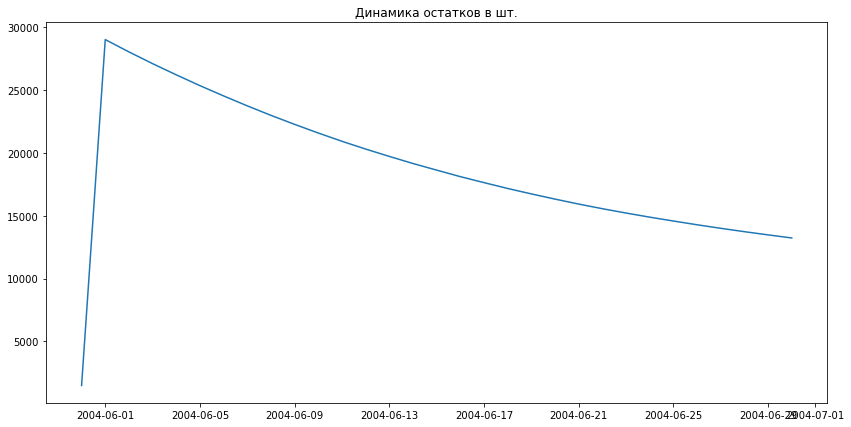

In [20]:
plt.figure(figsize=(14,7)) # Размер рисунка
stock_sum = stock_forecast.groupby('date')['quantity'].sum() # суммарный остаток на каждую дату
plt.plot(stock_sum)    
plt.title('Динамика остатков в шт.')
plt.show()

In [21]:
stock_sum

date
2004-05-31     1491.0
2004-06-01    29007.0
2004-06-02    28027.0
2004-06-03    27092.0
2004-06-04    26202.0
2004-06-05    25343.0
2004-06-06    24525.0
2004-06-07    23735.0
2004-06-08    22979.0
2004-06-09    22262.0
2004-06-10    21574.0
2004-06-11    20916.0
2004-06-12    20297.0
2004-06-13    19714.0
2004-06-14    19149.0
2004-06-15    18623.0
2004-06-16    18104.0
2004-06-17    17628.0
2004-06-18    17163.0
2004-06-19    16731.0
2004-06-20    16317.0
2004-06-21    15922.0
2004-06-22    15554.0
2004-06-23    15209.0
2004-06-24    14882.0
2004-06-25    14575.0
2004-06-26    14276.0
2004-06-27    13995.0
2004-06-28    13726.0
2004-06-29    13472.0
2004-06-30    13227.0
Name: quantity, dtype: float64

Результаты расчетов показывают, что спустя месяц в магазине останется всего 531шт. На конец мая сотаввалось 1491шт, что тоже кажется достаточно маленькой цифрой, если предположить, что обычно магазин торгует бутылками по 0,5л.

## Расчеты по транспортировке

Посчитаем, чем мы сможем перевезти такое количество бутылок.

В интернете пишут, что в еврофуру объемом 82 кубических метра может помещаться около 27 200 бутылок (0,5) пива. Пива перевозится ящиками по 20 шт.

In [22]:
print('Количество бутылок в 1 м3: ', 27200/80)

Количество бутылок в 1 м3:  340.0


In [23]:
print('Объем товара на начало месяца',round(1491.0/340, 2), 'м3')

Объем товара на начало месяца 4.39 м3


In [24]:
print('Объем товара на конец месяца',round(531.0/340, 2), 'м3')

Объем товара на конец месяца 1.56 м3


Объем маленького грузового транспорта - 12 м3. Поэтому можно рекоммендовать распродажу плохо продающихся товаров, чтобы исключить перевозку. Посмотрим, какие именно товары нужно распродать.

In [26]:
final_stock = stock_forecast[(stock_forecast['date'] == '2004-06-30') & (stock_forecast['quantity'] > 0)]
final_stock

,date,good_id,product,subgroup,avg_price,sale_price,quantity,sale_quantity,sales_speed
1800,2004-06-30,8090100005,HOLSTEN Калуга св.пив0.5L,"Пиво отечествен.емк.0,5л и менее",18.79,29.0,5.0,31,1.000000
1804,2004-06-30,8090100019,КЛИНСКОЕ зол.св.пиво0.33L,"Пиво отечествен.емк.0,5л и менее",9.78,15.0,11.0,1,0.032258
1805,2004-06-30,8090100019,КЛИНСКОЕ зол.св.пиво0.33L,"Пиво отечествен.емк.0,5л и менее",9.78,15.0,47.0,1,0.032258
1809,2004-06-30,8090100045,НЕВСКОЕ светлое пиво0.5L,"Пиво отечествен.емк.0,5л и менее",14.68,22.0,20.0,9,0.290323
1810,2004-06-30,8090100046,НЕВСКОЕ свет.ж/б пиво0.5L,"Пиво отечествен.емк.0,5л и менее",15.50,24.0,20.0,22,0.709677
...,...,...,...,...,...,...,...,...,...
57645,2004-06-30,8090200091,HEINEKEN LAGER пиво0.65L,Пиво отечествен.емк.более 0.5л,36.20,55.0,3.0,3,0.096774
57646,2004-06-30,8090200093,HEINEKEN LAGER пиво0.33L,"Пиво отечествен.емк.0,5л и менее",20.49,32.0,33.0,5,0.161290
57648,2004-06-30,8090300046,пиво/0.33л/hoegaarden wha,Пиво импортное,33.60,51.0,6.0,6,0.193548
57652,2004-06-30,8090300057,GROLSCH PR.LAGERпиво0.47L,Пиво импортное,74.61,110.0,9.0,5,0.161290
